## 0 - Abricion de dataframes

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import geopandas as gpd
from fuzzywuzzy import process # se usa para hacer match de strings

In [15]:
beneficiarios_df = pd.read_csv("../data/beneficiarios_sample_limpio.csv", encoding='latin1')
mle_2023_df = pd.read_csv("../data/export MLE 2023 limpio.csv", encoding='latin1')

In [16]:
beneficiarios_df

,MES_INFORMACION,CÓDIGO_BENEFICIARIO,SEXO,EDAD_TRAMO,TITULAR_CARGA,TRAMO_FONASA,TRAMO_RENTA,NACIONALIDAD,CARACTERIZACIÓN,TIPO_ASEGURADO,REGIÓN_BENEFICIARIO,COMUNA_BENEFICIARIO
0,202312,71819187,Hombre,40 a 49 años,Titular,D,650.001 - 700.000,Chilena,Dependiente,Trabajador Dependiente,Del Bíobío,Curanilahue
1,202312,80064014,Hombre,40 a 49 años,Titular,D,900.001 - 950.000,Chilena,Dependiente,Trabajador Dependiente,Del Bíobío,Concepción
2,202312,87503153,Mujer,50 a 59 años,Titular,A,Sin Cotizaciones,Chilena,Grupo Hogar Carente,Carente,De La Araucanía,Ercilla
3,202312,71657668,Mujer,40 a 49 años,Titular,A,Sin Cotizaciones,Chilena,Suf,Carente,De La Araucanía,Victoria
4,202312,75628648,Mujer,40 a 49 años,Titular,B,1 - 100.000,Chilena,Pensionado,Pensionado,De La Araucanía,Victoria
...,...,...,...,...,...,...,...,...,...,...,...,...
95,202312,68400895,Hombre,40 a 49 años,Titular,B,800.001 - 850.000,Chilena,Empleado Del Sector Salud,Trabajador Dependiente,Metropolitana De Santiago,Maipú
96,202312,86602758,Mujer,30 a 39 años,Titular,C,Sin Cotizaciones,Chilena,Dependiente,Trabajador Dependiente,Metropolitana De Santiago,Peñaflor
97,202312,76736354,Mujer,30 a 39 años,Titular,B,350.001 - 400.000,Chilena,Dependiente,Trabajador Dependiente,Metropolitana De Santiago,Estación Central
98,202312,69521217,Hombre,30 a 39 años,Titular,C,Sin Cotizaciones,Chilena,Dependiente,Trabajador Dependiente,Metropolitana De Santiago,Estación Central


In [17]:
mle_2023_df

,MES_EMISION,CODIGO_PRESTACIN,DESC_SECCION,DESC_ITEM,CODIGO_BENEFICIARIO,TRAMO_FONASA,EDAD_TRAMO,SEXO,REGION_EMISION,COMUNA_EMISION,PRESTRACIONES,MONTO_FAM,MONTO_COPAGO
0,202305,309022,Exmenes De Diagnstico,Laboratorio Clnico,97481406,D,35 a 39 aos,Mujer,Metropolitana De Santiago,La Cisterna,1.0,890,900
1,202305,302023,Exmenes De Diagnstico,Laboratorio Clnico,76712895,X,50 a 54 aos,Hombre,De Tarapac,Iquique,1.0,630,1390
2,202305,302023,Exmenes De Diagnstico,Laboratorio Clnico,69353764,B,50 a 54 aos,Mujer,Metropolitana De Santiago,San Joaqun,1.0,630,1390
3,202305,302023,Exmenes De Diagnstico,Laboratorio Clnico,76007327,B,55 a 59 aos,Mujer,Del Bobo,Curanilahue,1.0,630,1390
4,202305,302023,Exmenes De Diagnstico,Laboratorio Clnico,81474165,B,55 a 59 aos,Mujer,Metropolitana De Santiago,Las Condes,1.0,630,1390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99818,202308,101202,Atencin Mdica,Consulta Mdica,76391769,D,85 a 89 aos,Mujer,De Valparaso,Villa Alemana,1.0,9330,15550
99819,202308,101203,Atencin Mdica,Consulta Mdica,75506267,D,85 a 89 aos,Mujer,De Tarapac,Arica,1.0,9330,15550
99820,202306,101209,Atencin Mdica,Consulta Mdica,81255758,D,25 a 29 aos,Mujer,De Los Ros,Valdivia,1.0,9330,15550
99821,202306,101209,Atencin Mdica,Consulta Mdica,78171390,D,40 a 44 aos,Mujer,Del Maule,Curic,1.0,9330,15550


## 1. ¿Qué tipos de prestación médica son más frecuentes entre diferentes tramos de edad y géneros?**

## 2. ¿Cómo varía la cantidad y tipo de prestaciones emitidas según el mes del año? ¿Existen patrones estacionales?

## 3. ¿Qué tipos de prestación médica son más frecuentes en cada región?

In [18]:
mapa = gpd.read_file("../data/Regiones/Regional.shp")
mapa

,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,Region,geometry
0,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,Región de Arica y Parinacota,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
1,1085,2,1,42284.567484,4.830637e+10,1.213713e+06,Región de Tarapacá,"MULTIPOLYGON (((-7810213.515 -2298008.280, -78..."
2,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,Región de Antofagasta,"MULTIPOLYGON (((-7870470.961 -2985679.186, -78..."
3,1087,15,12,133053.142345,3.581316e+11,9.049830e+07,Región de Magallanes y Antártica Chilena,"MULTIPOLYGON (((-7494057.535 -7542535.383, -74..."
4,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,Región de Aysén del Gral.Ibañez del Campo,"MULTIPOLYGON (((-8413517.696 -6234055.255, -84..."
5,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,Región de Atacama,"MULTIPOLYGON (((-7932747.769 -3311218.615, -79..."
6,1090,5,4,40575.901682,5.498082e+10,2.065933e+06,Región de Coquimbo,"MULTIPOLYGON (((-7963268.900 -3784870.143, -79..."
7,1091,6,5,16322.970393,2.301475e+10,1.679609e+06,Región de Valparaíso,"MULTIPOLYGON (((-8991645.917 -3991821.789, -89..."
8,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,Región Metropolitana de Santiago,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
9,1093,13,10,48408.371357,8.771834e+10,7.874158e+06,Región de Los Lagos,"MULTIPOLYGON (((-8331768.181 -5403721.402, -83..."


In [19]:
# Agrupar por región y tipo de prestación
prestacion_frecuente = mle_2023_df.groupby(['REGION_EMISION', 'DESC_SECCION']).size().reset_index(name='FRECUENCIA')

In [20]:
# Encontrar el tipo de prestación más frecuente en cada región
prestacion_mas_frecuente = prestacion_frecuente.loc[prestacion_frecuente.groupby('REGION_EMISION')['FRECUENCIA'].idxmax()]

In [21]:
prestacion_mas_frecuente

,REGION_EMISION,DESC_SECCION,FRECUENCIA
3,De Antofagasta,Exmenes De Diagnstico,1808
12,De Arica Y Parinacota,Exmenes De Diagnstico,446
20,De Atacama,Exmenes De Diagnstico,719
28,De Aysn Del Gral. C. Ibez Del Campo,Exmenes De Diagnstico,110
36,De Coquimbo,Exmenes De Diagnstico,2095
46,De La Araucana,Exmenes De Diagnstico,1563
56,De Los Lagos,Exmenes De Diagnstico,1973
65,De Los Ros,Exmenes De Diagnstico,858
74,De Magallanes Y De La Antrtica Chilena,Exmenes De Diagnstico,345
81,De Tarapac,Exmenes De Diagnstico,936


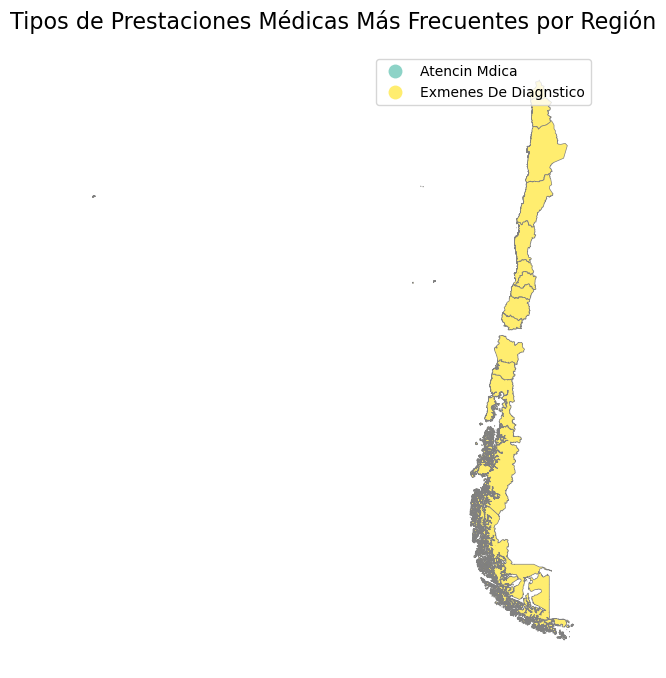

In [22]:
mapa['Region_Normalizada'] = mapa['Region'].str.lower()
prestacion_mas_frecuente['Region_Normalizada'] = prestacion_mas_frecuente['REGION_EMISION'].str.lower()

# Crear un diccionario de correspondencia aproximada entre nombres de regiones
region_map = {region: process.extractOne(region, mapa['Region'])[0] for region in prestacion_mas_frecuente['REGION_EMISION']}

# Reemplazar los nombres en prestacion_mas_frecuente
prestacion_mas_frecuente['Region'] = prestacion_mas_frecuente['REGION_EMISION'].map(region_map)

# Combinar datos con el mapa
mapa_final = mapa.merge(prestacion_mas_frecuente, on='Region', how='left')

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa_final.plot(
    column='DESC_SECCION', cmap='Set3', ax=ax, linewidth=0.5, edgecolor='0.5', 
    legend=True, categorical=True  # Usar categorical=True para asegurarse de que los tipos sean tratados como categorías
)

# Ajustar el título y los ejes
plt.title('Tipos de Prestaciones Médicas Más Frecuentes por Región', fontsize=16)
plt.axis('off')
plt.show()

**4. ¿Cómo se relacionan los distintos tramos de Fonasa con la frecuencia y el tipo de prestaciones recibidas?**

In [23]:
mle_2023_df = mle_2023_df.rename(columns={'PRESTRACIONES': 'PRESTACIONES'})

In [24]:
# Calcular la frecuencia total de prestaciones por tramo Fonasa
cant_por_tramo = mle_2023_df.groupby("TRAMO_FONASA")["PRESTACIONES"].sum().reset_index()

cant_por_tramo.columns = ["Tramo Fonasa", "Total Prestaciones"]

print(cant_por_tramo)

  Tramo Fonasa  Total Prestaciones
0            A                28.0
1            B             55262.0
2            C             20508.0
3            D             45021.0
4            X               588.0


In [25]:
# Agrupar por tramo y tipo de prestación (sección)
tipo_por_tramo = mle_2023_df.groupby(["TRAMO_FONASA", "DESC_SECCION"])["PRESTACIONES"].sum().reset_index()

# Sorteamos
tipo_por_tramo = tipo_por_tramo.sort_values(["TRAMO_FONASA", "PRESTACIONES"], ascending=[True, False])

tipo_por_tramo.head()

,TRAMO_FONASA,DESC_SECCION,PRESTACIONES
0,A,Atencin Mdica,16.0
1,A,Exmenes De Diagnstico,10.0
2,A,Intervenciones Quirrgicas,1.0
3,A,Proc. Apoyo Clnico Y Terap.,1.0
7,B,Exmenes De Diagnstico,25904.0


In [26]:
# Agrupar por tramo Fonasa y edad
distribucion_edad = beneficiarios_df.groupby(["TRAMO_FONASA", "EDAD_TRAMO"]).size().reset_index(name="Count")

distribucion_edad.head()

,TRAMO_FONASA,EDAD_TRAMO,Count
0,A,30 a 39 años,3
1,A,40 a 49 años,9
2,A,50 a 59 años,1
3,B,20 a 29 años,1
4,B,30 a 39 años,5


In [27]:
# Agrupar por tramo Fonasa y sexo
distribucion_genero = beneficiarios_df.groupby(["TRAMO_FONASA", "SEXO"]).size().reset_index(name="Count")

print(distribucion_genero)

  TRAMO_FONASA    SEXO  Count
0            A  Hombre      4
1            A   Mujer      9
2            B  Hombre      8
3            B   Mujer     22
4            C  Hombre     11
5            C   Mujer     12
6            D  Hombre     20
7            D   Mujer     14


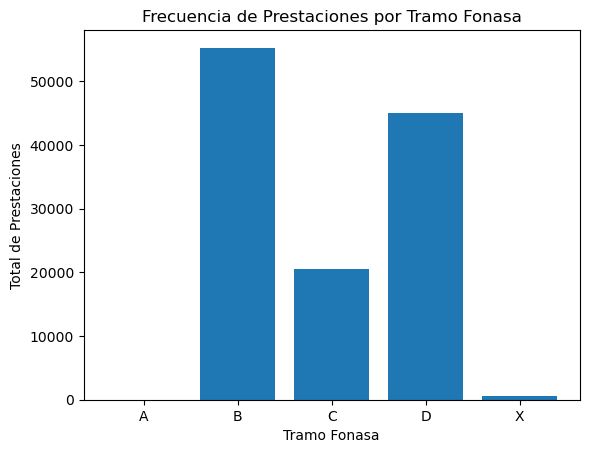

In [28]:
import matplotlib.pyplot as plt

plt.bar(cant_por_tramo["Tramo Fonasa"], cant_por_tramo["Total Prestaciones"])
plt.title("Frecuencia de Prestaciones por Tramo Fonasa")
plt.xlabel("Tramo Fonasa")
plt.ylabel("Total de Prestaciones")
plt.show()

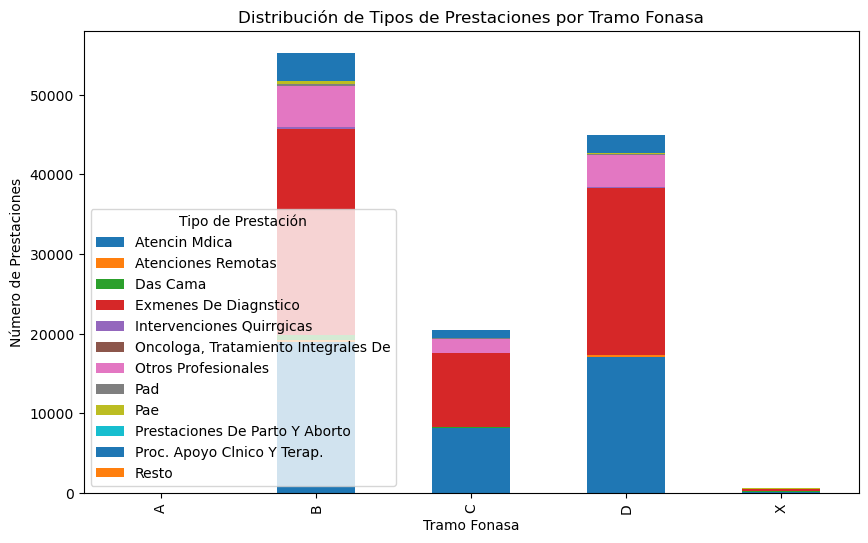

In [29]:
# Gráfico apilado para tipos de prestaciones por tramo
type_pivot = tipo_por_tramo.pivot(index="TRAMO_FONASA", columns="DESC_SECCION", values="PRESTACIONES")
type_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Distribución de Tipos de Prestaciones por Tramo Fonasa")
plt.xlabel("Tramo Fonasa")
plt.ylabel("Número de Prestaciones")
plt.legend(title="Tipo de Prestación")
plt.show()

In [30]:
# Calcular la frecuencia total de prestaciones por tramo Fonasa
cant_por_tramo = mle_2023_df.groupby("TRAMO_FONASA")["PRESTACIONES"].sum().reset_index()
cant_por_tramo.columns = ["Tramo Fonasa", "Total Prestaciones"]

tipo_por_tramo = mle_2023_df.groupby(["TRAMO_FONASA", "DESC_SECCION"])["PRESTACIONES"].sum().reset_index()

tipo_por_tramo = tipo_por_tramo.sort_values(["TRAMO_FONASA", "PRESTACIONES"], ascending=[True, False])

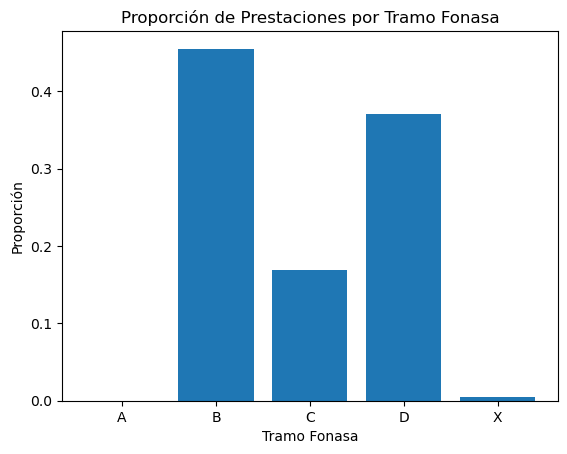

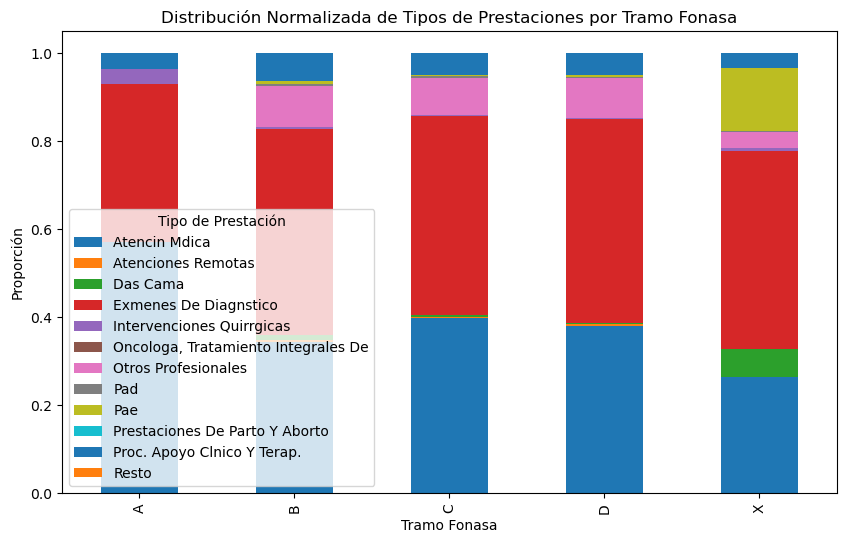

In [31]:
# Normalizar frecuencia total de prestaciones por tramo
cant_por_tramo["Proporción"] = cant_por_tramo["Total Prestaciones"] / cant_por_tramo["Total Prestaciones"].sum()

# Normalizar tipos de prestaciones por tramo
tipo_por_tramo["Proporción"] = tipo_por_tramo.groupby("TRAMO_FONASA")["PRESTACIONES"].transform(lambda x: x / x.sum())

plt.bar(cant_por_tramo["Tramo Fonasa"], cant_por_tramo["Proporción"])
plt.title("Proporción de Prestaciones por Tramo Fonasa")
plt.xlabel("Tramo Fonasa")
plt.ylabel("Proporción")
plt.show()

type_pivot_normalized = tipo_por_tramo.pivot(index="TRAMO_FONASA", columns="DESC_SECCION", values="Proporción")
type_pivot_normalized.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Distribución Normalizada de Tipos de Prestaciones por Tramo Fonasa")
plt.xlabel("Tramo Fonasa")
plt.ylabel("Proporción")
plt.legend(title="Tipo de Prestación")
plt.show()  

## 4. ¿Cómo se relacionan los distintos tramos de Fonasa con la frecuencia y el tipo de prestaciones recibidas?


## 5. ¿Cómo cambia el gasto promedio en copagos a medida que los beneficiarios envejecen?